<a href="https://colab.research.google.com/github/rodrigoyuji22/controle_de_treinamentos/blob/main/checkpoint_IA_CHALLENGE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

# Carregar dados do Excel
df = pd.read_excel("/content/treinamento_dados_genericos1.xlsx")

# Exibir as primeiras linhas
print(df.head())


     Colaborador              Área Procedimento Crítico Status do Treinamento  \
0  Colaborador_1  Recursos Humanos                  Sim              Pendente   
1  Colaborador_2  Recursos Humanos                  Sim             Concluído   
2  Colaborador_3  Recursos Humanos                  Sim              Pendente   
3  Colaborador_4          Finanças                  Não             Concluído   
4  Colaborador_5                TI                  Sim             Concluído   

  Prazo do Treinamento Conclusão do Treinamento  
0           2023-08-21                      NaT  
1           2023-05-14               2023-05-18  
2           2023-03-27                      NaT  
3           2023-09-02               2023-09-21  
4           2023-11-19               2023-11-28  


In [ ]:
df = df.fillna(np.nan)

In [ ]:
# Verificar valores ausentes
print(df.isnull().sum())


Colaborador                  0
Área                         0
Procedimento Crítico         0
Status do Treinamento        0
Prazo do Treinamento         0
Conclusão do Treinamento    66
Atraso                       0
dtype: int64


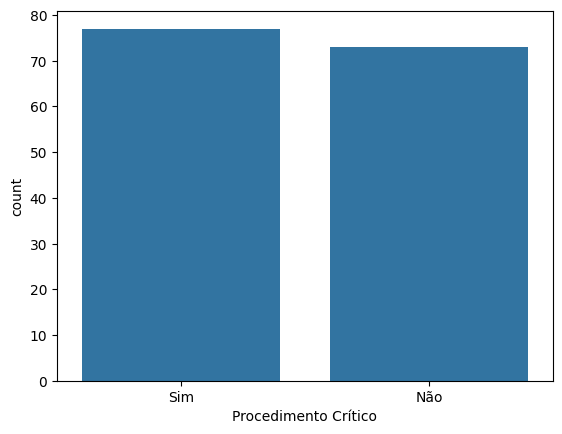

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Gráfico de barras para status de treinamento
sns.countplot(x="Procedimento Crítico", data=df)
plt.show()


In [ ]:
# Converter para datetime
df['Prazo do Treinamento'] = pd.to_datetime(df['Prazo do Treinamento'])
df['Conclusão do Treinamento'] = pd.to_datetime(df['Conclusão do Treinamento'])


In [ ]:
# Criar coluna para atrasos
df['Atraso'] = df['Conclusão do Treinamento'] > df['Prazo do Treinamento']


In [ ]:
from sklearn.model_selection import train_test_split

X = df[["Colaborador", "Área", "Procedimento Crítico"]]  # Features (Variáveis independentes)
y = df["Atraso"]  # Target (Variável dependente)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [ ]:
# Remover a coluna 'Colaborador' pois não é relevante para o modelo
X_train = X_train.drop(columns=['Colaborador'])
X_test = X_test.drop(columns=['Colaborador'])


In [ ]:
# Aplicar one-hot encoding para a variável 'Área' e 'Procedimento Crítico'
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Inicializar o modelo
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)




In [ ]:
# Treinar o modelo
model_rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred_rf = model_rf.predict(X_test)


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Acurácia
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Acurácia:", accuracy_rf * 100, "%")

# Relatório de classificação
print("Relatório de Classificação:\n", classification_report(y_test, y_pred_rf))

# Matriz de confusão
cm_rf = confusion_matrix(y_test, y_pred_rf)
print("Matriz de Confusão:\n", cm_rf)


Acurácia: 63.33333333333333 %
Relatório de Classificação:
               precision    recall  f1-score   support

       False       0.64      0.50      0.56        14
        True       0.63      0.75      0.69        16

    accuracy                           0.63        30
   macro avg       0.63      0.62      0.62        30
weighted avg       0.63      0.63      0.63        30

Matriz de Confusão:
 [[ 7  7]
 [ 4 12]]
